In [1]:
%pip install langgraph -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import langgraph
import langgraph.version

langgraph.version.__version__

'0.2.73'

In [3]:
import os
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

# Make sure your environment variables are set:
#   export OPENAI_API_KEY="your_api_key"
#   export OPENAI_BASE_URL="https://your-endpoint.com/v1"
# openai.api_key = os.getenv("OPENAI_API_KEY")
# openai.api_base = os.getenv("OPENAI_BASE_URL")

# Define the custom state structure for the research agent.
class ResearchAgentState(TypedDict):
    depth: int
    breadth: int
    query: str
    results: str
    directions: str
    learnings: str
    report: str

# Node: Input Node (initializes or verifies state parameters)
def input_node(state: ResearchAgentState) -> ResearchAgentState:
    # You can modify or confirm state values here if needed.
    return state

# Node: Deep Research - perform initial research using the query.
def learner_node(state: ResearchAgentState) -> ResearchAgentState:
    prompt = (
        f"You are a research assistant. We have a query: '{state['query']}'.\n"
        f"Depth: {state['depth']}, Breadth: {state['breadth']}.\n"
        "Generate an outline of subtopics or steps to research deeply."
    )
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo", 
        messages=[{"role": "user", "content": prompt}]
    )
    outline = response.choices[0].message["content"]
    state["results"] = f"Initial Outline:\n{outline}"
    return state

# Node: SERP Queries - simulate search engine queries.
def serp_queries(state: ResearchAgentState) -> ResearchAgentState:
    serp_result = "Mock SERP Results: [List of relevant URLs and summaries]"
    state["results"] += f"\n\nSERP Results:\n{serp_result}"
    return state

# Node: Process Results - summarize the collected research.
def process_results(state: ResearchAgentState) -> ResearchAgentState:
    prompt = (
        "Summarize the following research findings in bullet points. "
        "Highlight key learnings and potential directions.\n\n"
        f"{state['results']}"
    )
    summary = "something"
    state["learnings"] = summary
    return state

# Node: Compile Results - generate potential directions based on the learnings.
def compile_results(state: ResearchAgentState) -> ResearchAgentState:
    prompt = (
        f"Based on these learnings:\n{state['learnings']}\n"
        "List 3 next directions or deeper questions to explore."
    )
    response = "something"
    directions = response.choices[0].message["content"]
    state["directions"] = directions
    return state

# Node: Check Depth - conditional function to decide the next node.
def check_depth(state: ResearchAgentState):
    # If depth is still greater than 0, return the key for the next direction.
    # Otherwise, return the key for compiling the final report.
    return "next_direction" if state["depth"] > 0 else "markdown_report"

# Node: Next Direction - refine the query and reduce the depth.
def next_direction(state: ResearchAgentState) -> ResearchAgentState:
    state["depth"] -= 1  # Decrement depth
    state["query"] = f"{state['query']} + (refined with new subtopics)"
    return state

# Node: Markdown Report - compile the final report.
def markdown_report(state: ResearchAgentState) -> ResearchAgentState:
    md_report = (
        f"# Final Report\n\n"
        f"## Query\n{state['query']}\n\n"
        f"## Key Learnings\n{state['learnings']}\n\n"
        f"## Potential Directions\n{state['directions']}\n\n"
    )
    state["report"] = md_report
    return state

# -------------------------------
# Build the LangGraph state graph
# -------------------------------
graph = StateGraph(state_schema=ResearchAgentState)

# Add nodes to the graph.
graph.add_node("input", input_node)
graph.add_node("learner_node", learner_node)
graph.add_node("serp_queries", serp_queries)
graph.add_node("process_results", process_results)
graph.add_node("compile_results", compile_results)
graph.add_node("check_depth", lambda state: state)  # 'check_depth' node passes state unchanged.
graph.add_node("next_direction", next_direction)
graph.add_node("markdown_report", markdown_report)

# Define explicit edges between nodes.
graph.add_edge(START, "input")
graph.add_edge("input", "learner_node")
graph.add_edge("learner_node", "serp_queries")
graph.add_edge("serp_queries", "process_results")
graph.add_edge("process_results", "compile_results")
graph.add_edge("compile_results", "check_depth")

# Add conditional edges: the 'check_depth' node uses the `check_depth` function to decide the next step.
graph.add_conditional_edges(
    "check_depth", 
    check_depth, 
    path_map={
        "next_direction": "next_direction",
        "markdown_report": "markdown_report"
    }
)

# Connect the 'next_direction' node back to 'learner_node' for further iterations.
graph.add_edge("next_direction", "learner_node")

# Finally, connect the 'markdown_report' node to END.
graph.add_edge("markdown_report", END)

In [4]:
# -------------------------------
# Build the LangGraph state graph
# -------------------------------
graph = StateGraph(state_schema=ResearchAgentState)

# Add nodes to the graph.
graph.add_node("input", input_node)
graph.add_node("learner_node", learner_node)
graph.add_node("serp_queries", serp_queries)
graph.add_node("process_results", process_results)
graph.add_node("compile_results", compile_results)
graph.add_node("check_depth", lambda state: state)  # 'check_depth' node passes state unchanged.
graph.add_node("next_direction", next_direction)
graph.add_node("markdown_report", markdown_report)

# Define explicit edges between nodes.
graph.add_edge(START, "input")
graph.add_edge("input", "learner_node")
graph.add_edge("learner_node", "serp_queries")
graph.add_edge("serp_queries", "process_results")
graph.add_edge("process_results", "compile_results")
graph.add_edge("compile_results", "check_depth")

# Add conditional edges: the 'check_depth' node uses the `check_depth` function to decide the next step.
graph.add_conditional_edges(
    "check_depth", 
    check_depth, 
    path_map={
        "next_direction": "next_direction",
        "markdown_report": "markdown_report"
    }
)

# Connect the 'next_direction' node back to 'learner_node' for further iterations.
graph.add_edge("next_direction", "learner_node")

# Finally, connect the 'markdown_report' node to END.
graph.add_edge("markdown_report", END)



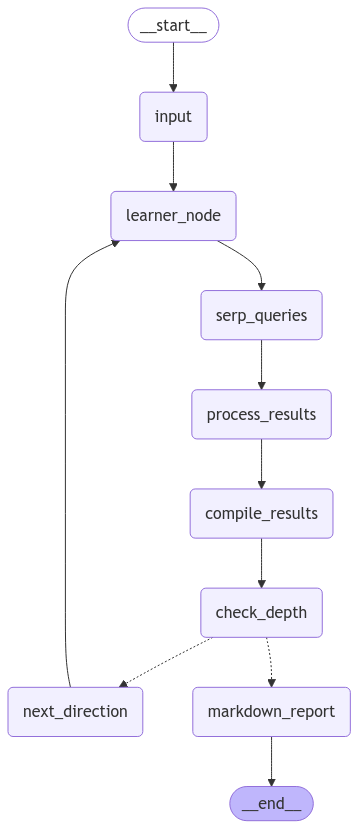

In [5]:
from IPython.display import Image, display

# Generate the graph visualization.
graph_v = graph.compile()
viz = graph_v
display(Image(viz.get_graph(xray=1).draw_mermaid_png()))

In [6]:

# ---------------------------------
# Execute the graph with an initial state.
# ---------------------------------
# initial_state: ResearchAgentState = {
#     "depth": 1,  # For example, perform one round of refinement.
#     "breadth": 3,
#     "query": "Quantum Computing breakthroughs",
#     "results": "",
#     "directions": "",
#     "learnings": "",
#     "report": ""
# }

# final_state = graph.run(initial_state)

# print("=== MARKDOWN REPORT ===")
# print(final_state["report"])